In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords

import sklearn

import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, SpatialDropout1D, MaxPool1D, Conv1D,Conv2D,GlobalMaxPooling1D, MaxPooling2D, UpSampling2D,Dropout,Flatten, Embedding, LSTM
from keras.models import Model,Sequential
from keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications import VGG16
from keras.preprocessing import sequence
from keras import regularizers
import keras
import tensorflow as tf

from keras.utils import np_utils, to_categorical 
from keras.datasets import cifar10
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import SGD, Adam, RMSprop

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.layers import SimpleRNN, LSTM, Embedding

import tensorflow.keras as tfk
tfkl = tfk.layers

In [2]:
import nltk
from nltk.corpus import stopwords


Question 1

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalize training and testing data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

170500096/170498071 [==============================] - 11s 0us/step


In [6]:
# input layer
input_img = keras.Input(shape=(32, 32, 3))  

# Convolutional autoencoder: 
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, kernel_size = (3, 3), activation='relu', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)          

In [7]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
391/391 [==============================] - 161s 411ms/step - loss: 0.7553 - accuracy: 0.3642 - val_loss: 0.6196 - val_accuracy: 0.3836
Epoch 2/10
391/391 [==============================] - 163s 417ms/step - loss: 0.6110 - accuracy: 0.4249 - val_loss: 0.6061 - val_accuracy: 0.4487
Epoch 3/10
391/391 [==============================] - 159s 406ms/step - loss: 0.6410 - accuracy: 0.4318 - val_loss: 0.6144 - val_accuracy: 0.4482
Epoch 4/10
391/391 [==============================] - 159s 406ms/step - loss: 0.6097 - accuracy: 0.4572 - val_loss: 0.6279 - val_accuracy: 0.4924
Epoch 5/10
391/391 [==============================] - 159s 407ms/step - loss: 0.6101 - accuracy: 0.4398 - val_loss: 0.6065 - val_accuracy: 0.4580
Epoch 6/10
391/391 [==============================] - 158s 405ms/step - loss: 0.6075 - accuracy: 0.4414 - val_loss: 0.6028 - val_accuracy: 0.4367
Epoch 7/10
391/391 [==============================] - 158s 405ms/step - loss: 0.6024 - accuracy: 0.4515 - val_loss: 0.6014 -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


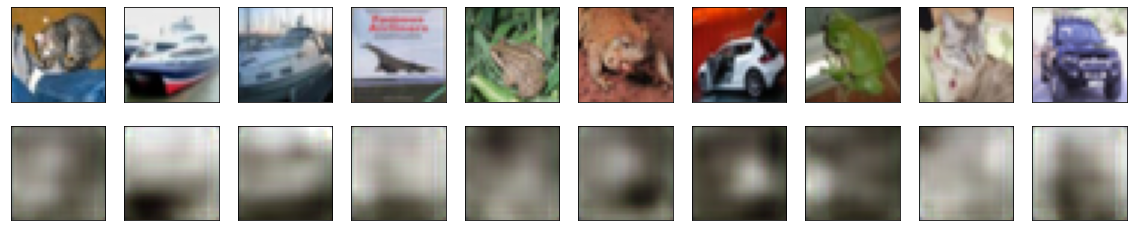

In [10]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Question 2

In [11]:
tf.one_hot(y_train,10)
model = Sequential()
# 1
model.add(tfkl.Conv2D(32,
                      (3,3),
                      strides=1,
                      input_shape=(32,32,3),
                      padding='valid',
                      activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(2,2)))
model.add(tfkl.Dropout(0.3))

# 2
model.add(tfkl.Conv2D(32,
                      (3,3),
                      strides=1,
                      padding='valid',
                      activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(2,2)))
model.add(tfkl.Dropout(0.3))
model.add(tfkl.Flatten())
# 3
model.add(tfkl.Dense(64,activation='relu'))
model.add(tfkl.Dropout(0.5))
model.add(tfkl.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [12]:
model.compile(optimizer=tfk.optimizers.RMSprop(),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [13]:
train_label = to_categorical(y_train)
test_label = to_categorical(y_test)
results = model.fit(x_train,
                      train_label,
                      steps_per_epoch=100,
                      epochs=20, 
                      batch_size=16,
                      validation_data=(x_test,test_label))

Epoch 1/20
100/100 [==============================] - 5s 53ms/step - loss: 2.2894 - accuracy: 0.1356 - val_loss: 2.2262 - val_accuracy: 0.2004
Epoch 2/20
100/100 [==============================] - 5s 50ms/step - loss: 2.1696 - accuracy: 0.1869 - val_loss: 2.0989 - val_accuracy: 0.2412
Epoch 3/20
100/100 [==============================] - 5s 50ms/step - loss: 2.0858 - accuracy: 0.2331 - val_loss: 2.0118 - val_accuracy: 0.2917
Epoch 4/20
100/100 [==============================] - 5s 50ms/step - loss: 2.0065 - accuracy: 0.2594 - val_loss: 1.8740 - val_accuracy: 0.3320
Epoch 5/20
100/100 [==============================] - 5s 50ms/step - loss: 1.9461 - accuracy: 0.2869 - val_loss: 1.8086 - val_accuracy: 0.3678
Epoch 6/20
100/100 [==============================] - 5s 51ms/step - loss: 1.9115 - accuracy: 0.2894 - val_loss: 1.8421 - val_accuracy: 0.3412
Epoch 7/20
100/100 [==============================] - 5s 52ms/step - loss: 1.8651 - accuracy: 0.3100 - val_loss: 1.7179 - val_accuracy: 0.4094

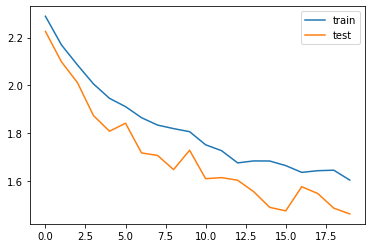

In [14]:
# Test and train results
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(labels=['train','test'])

In [15]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
conv_base.summary()

58892288/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [16]:
model = Sequential()
model.add(conv_base)
model.add(tfkl.Flatten())
model.add(tfkl.Dense(32, 
                      activation='relu'))
model.add(tfkl.Dropout(0.5))
model.add(tfkl.Dense(10, 
                      activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 14,731,434
Trainable params: 14,731,434
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=tfk.optimizers.RMSprop(),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [18]:
results = model.fit(x_train, 
                      train_label, 
                      epochs=5, 
                      batch_size=32,
                      validation_data=(x_test,test_label))

Epoch 1/5
 608/1563 [==========>...................] - ETA: 52:36 - loss: 5.1128 - accuracy: 0.0995

KeyboardInterrupt: ignored

In [ ]:
# Test and train results
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(labels=['train','test'])

Question 3

In [19]:
spam = pd.read_csv('/content/drive/MyDrive/SPAM_detection.csv')
spam.head()

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [20]:
x = spam['Message'].values
y = spam['category_val'].values

In [21]:
tok = Tokenizer()
tok.fit_on_texts(x)
x = tok.texts_to_sequences(x)
x = sequence.pad_sequences(x)

In [22]:
x_train, x_test, y_train, y_test  = sklearn.model_selection.train_test_split(x, y, test_size=0.3)

In [24]:
## RNN with LSTM
model = tfk.Sequential()
model.add(tfkl.Embedding(len(tok.word_index)+1, 32, input_length=40))
model.add(tfkl.LSTM(128,return_sequences=True))
# reduce dimension
model.add(tfkl.GlobalMaxPool1D())
model.add(tfkl.Dropout(0.4))

model.add(tfkl.Dense(64,activation="relu"))
model.add(tfkl.Dropout(0.4))

model.add(tfkl.Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.01),metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 32)            288160    
_________________________________________________________________
lstm (LSTM)                  (None, 40, 128)           82432     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [25]:
model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=32,
          validation_data=(x_test,y_test))

Epoch 1/10
122/122 [==============================] - 26s 217ms/step - loss: 0.3251 - accuracy: 0.8928 - val_loss: 0.0763 - val_accuracy: 0.9755
Epoch 2/10
122/122 [==============================] - 26s 213ms/step - loss: 0.0676 - accuracy: 0.9846 - val_loss: 0.0491 - val_accuracy: 0.9880
Epoch 3/10
122/122 [==============================] - 26s 215ms/step - loss: 0.0332 - accuracy: 0.9928 - val_loss: 0.0604 - val_accuracy: 0.9892
Epoch 4/10
122/122 [==============================] - 26s 215ms/step - loss: 0.0261 - accuracy: 0.9946 - val_loss: 0.0575 - val_accuracy: 0.9898
Epoch 5/10
122/122 [==============================] - 26s 214ms/step - loss: 0.0120 - accuracy: 0.9982 - val_loss: 0.1428 - val_accuracy: 0.9815
Epoch 6/10
122/122 [==============================] - 26s 215ms/step - loss: 0.0064 - accuracy: 0.9992 - val_loss: 0.1785 - val_accuracy: 0.9779
Epoch 7/10
122/122 [==============================] - 26s 215ms/step - loss: 0.0059 - accuracy: 0.9995 - val_loss: 0.2441 - val_ac

In [26]:
y_rnn_pred = model.predict(x_test)
fpr_rnn, tpr_rnn, rnn_ = roc_curve(y_test, y_rnn_pred)
auc_rnn = auc(fpr_rnn, tpr_rnn)


In [27]:
x_train, x_test, y_train, y_test  = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [28]:
# cnn model fitting
model_cnn = tfk.Sequential([
  # relu fucntion
  tfkl.Conv1D(filters= 200,
              kernel_size=2,
              strides=1,
              activation='relu',
              padding='same',
              input_shape=(x_train.shape[1],1)),
  tfkl.MaxPooling1D(pool_size=2,
                    padding='same'),
  tfkl.Conv1D(filters = 128, 
              kernel_size=2,
              strides=1,
              activation='relu',
              padding='same'),
  tfkl.Dropout(0.3),
  tfkl.Conv1D(32,
              kernel_size=2,
              strides=1,
              activation='relu',
              padding='same'),
  tfkl.Flatten(),
  tfkl.Dense(16,
             activation='relu'),
  tfkl.Dense(1,
             activation='sigmoid')                     
])
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 189, 200)          600       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 95, 200)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 95, 128)           51328     
_________________________________________________________________
dropout_6 (Dropout)          (None, 95, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 95, 32)            8224      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3040)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)               

In [29]:
model_cnn.compile(loss='binary_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
# fit cnn model
model_cnn.fit(x_train,
              y_train,
              epochs = 10,
              batch_size = 32,
              validation_data=(x_test,y_test))

Epoch 1/10


ValueError: ignored

In [ ]:
y_cnn_pred = model_cnn.predict(x_test)

In [ ]:
fpr_cnn, tpr_cnn, cnn_ = roc_curve(y_test, y_cnn_pred)
auc_cnn = auc(fpr_cnn, tpr_cnn)
auc_cnn

In [ ]:
### ROC
plt.figure()
plt.plot([0, 1], [0, 1], 'm--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc = 'lower right')

plt.show()